In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and direc

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from gensim.models import Word2Vec
import networkx as nx
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/최종 자료/최종데이터_토큰화.csv', index_col=0)
df

,장점,단점
0,여유 있다 업 무량 명의 일 명 해도 충분하다 정도,연봉 너무 적다 출퇴근 기름값 빼다 촤 저 임금 안되다
1,자다 지다 고급스럽다 여의도 한가운데 자리 잡고 있다 여의도 본사,구시대 적 보수 적 꼰 대문 화가 정말 강하다 자리 잡다 업무 강도 높다
2,월급 밀리 않다 라서 뽕 맛 있다 회사 상황 보다 흠,야근 필수 칼퇴 위 일단 아무 안함 아니다 못 분위기 조성 시키다 두다 수당 안 줍...
3,여의도 위치 교통 편리 건물 내 있다 사무실 좋다,시대 역행 사내 분위기 야근 일 자다 일 없다 남다 함 아무 퇴근 않다
4,연차 눈치 안보 쓸다 수 있다 사내 분위기 좋다 의사 표현 자유 로움,미래 먹거리 투자가 부족하다 현재 조명 상승세 보이 같다
...,...,...
312268,장점 월급 잘나오다 그것 뿐,비합리적 의사결정 보수 적 문화 동 종업 계 다른 회사 보다 낮다 연봉 회사 규모 ...
312269,월급 거르 일 없이 꼬박꼬박 나오다 야근 시 오후 이후 야근 수당 지급,비합리적 인사 말 뿐 업무 순환 살인 적 업무 스케줄 책임 있다 권한 없다 담당자 ...
312270,괜찮다 연봉 팀 별로 틀리다 야근 많다 않다,군대 식 상 명 하복 식 회사 문화 복지 없다
312271,점심 식대 지원 및 서울 중심 위치 퇴근 후 운동 쇼핑 어학 공부 등 여가 생활 즐...,비교 적 빠르다 출근시간 보수 적 분위기


In [4]:
df.dropna(how='any', inplace=True)
df

,장점,단점
0,여유 있다 업 무량 명의 일 명 해도 충분하다 정도,연봉 너무 적다 출퇴근 기름값 빼다 촤 저 임금 안되다
1,자다 지다 고급스럽다 여의도 한가운데 자리 잡고 있다 여의도 본사,구시대 적 보수 적 꼰 대문 화가 정말 강하다 자리 잡다 업무 강도 높다
2,월급 밀리 않다 라서 뽕 맛 있다 회사 상황 보다 흠,야근 필수 칼퇴 위 일단 아무 안함 아니다 못 분위기 조성 시키다 두다 수당 안 줍...
3,여의도 위치 교통 편리 건물 내 있다 사무실 좋다,시대 역행 사내 분위기 야근 일 자다 일 없다 남다 함 아무 퇴근 않다
4,연차 눈치 안보 쓸다 수 있다 사내 분위기 좋다 의사 표현 자유 로움,미래 먹거리 투자가 부족하다 현재 조명 상승세 보이 같다
...,...,...
312268,장점 월급 잘나오다 그것 뿐,비합리적 의사결정 보수 적 문화 동 종업 계 다른 회사 보다 낮다 연봉 회사 규모 ...
312269,월급 거르 일 없이 꼬박꼬박 나오다 야근 시 오후 이후 야근 수당 지급,비합리적 인사 말 뿐 업무 순환 살인 적 업무 스케줄 책임 있다 권한 없다 담당자 ...
312270,괜찮다 연봉 팀 별로 틀리다 야근 많다 않다,군대 식 상 명 하복 식 회사 문화 복지 없다
312271,점심 식대 지원 및 서울 중심 위치 퇴근 후 운동 쇼핑 어학 공부 등 여가 생활 즐...,비교 적 빠르다 출근시간 보수 적 분위기


In [5]:
df_list = df.values.tolist()
print(df_list[:2])  # 처음 두 행만 출력

[['여유 있다 업 무량 명의 일 명 해도 충분하다 정도', '연봉 너무 적다 출퇴근 기름값 빼다 촤 저 임금 안되다'], ['자다 지다 고급스럽다 여의도 한가운데 자리 잡고 있다 여의도 본사', '구시대 적 보수 적 꼰 대문 화가 정말 강하다 자리 잡다 업무 강도 높다']]


In [6]:
# 각 행을 공백으로 나누어 리스트로 만듦
tokenized_data = [text.split() for row in df_list for text in row]

In [7]:
model = Word2Vec(tokenized_data, vector_size=100, window=2, min_count=70, sg=1, epochs=50)

In [8]:
model.save("word2vec.model")

In [37]:
import numpy as np
import networkx as nx
from tqdm import tqdm
from gensim.models import Word2Vec

# Word2Vec 모델 불러오기 (이전에 저장한 것을 사용)
model = Word2Vec.load('/content/drive/MyDrive/최종 자료/word2vec.model')

# 1. 임베딩 정규화
normalized_vectors = {}
for word in model.wv.index_to_key:
    normalized_vectors[word] = model.wv[word] / np.linalg.norm(model.wv[word])

def get_normalized_similarity(word1, word2):
    return np.dot(normalized_vectors[word1], normalized_vectors[word2])


k = 100

G = nx.Graph()
threshold = 0.2

# tqdm을 사용하여 진행 상황을 표시
for word1 in tqdm(model.wv.index_to_key, desc="Processing words", total=len(model.wv.index_to_key)):
    # 각 단어에 대해 가장 유사한 상위 k개의 단어를 가져옵니다.
    most_similar_words = [item[0] for item in model.wv.most_similar(word1, topn=k)]

    for word2 in most_similar_words:
        if word1 != word2:  # 자기 자신과의 유사도는 계산하지 않습니다.
            similarity = get_normalized_similarity(word1, word2)
            if similarity > threshold:
                G.add_edge(word1, word2, weight=similarity)

Processing words: 100%|██████████| 6421/6421 [00:20<00:00, 320.98it/s]


Layout iterations:   0%|          | 0/10 [00:00<?, ?it/s]

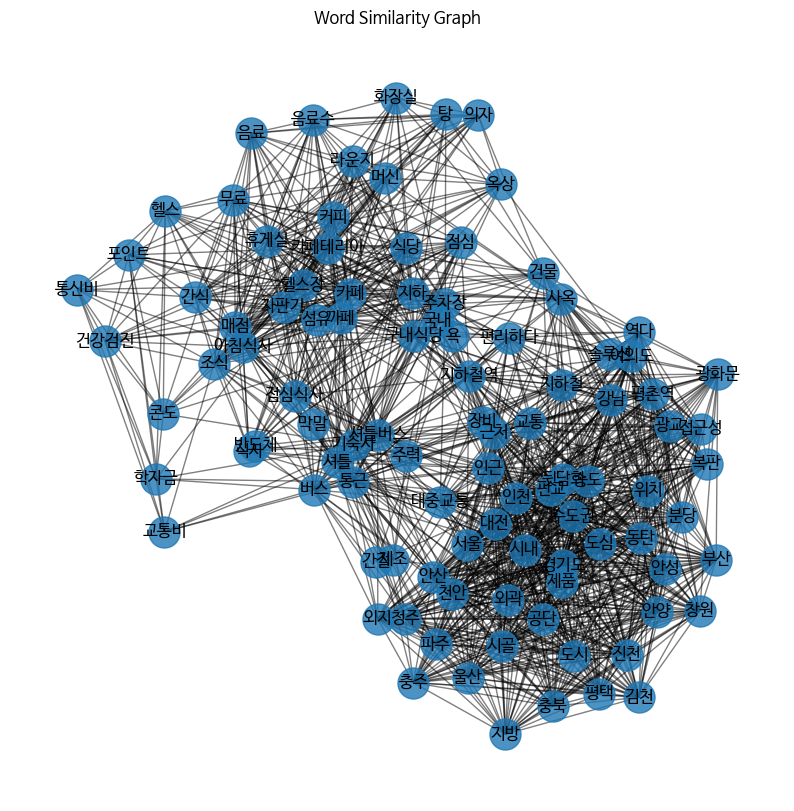

In [38]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스 (Colab 포함)
else:
    rc('font', family='NanumBarunGothic')

# 나머지 코드...

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import networkx as nx

def fast_visualize_graph_with_progress(G, weight_threshold=0.7, degree_threshold=5, top_N=100):
    # 그래프 경량화
    edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < weight_threshold]
    G.remove_edges_from(edges_to_remove)
    nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree < degree_threshold]
    G.remove_nodes_from(nodes_to_remove)

    # 상위 N개 노드만 선택
    sorted_nodes = sorted(G.nodes(), key=lambda node: G.degree(node), reverse=True)
    nodes_to_keep = sorted_nodes[:top_N]
    G = G.subgraph(nodes_to_keep)

    plt.figure(figsize=(10, 10))

    # kamada_kawai_layout의 진행도를 tqdm으로 표시
    def kamada_kawai_layout_with_progress(G, **kwargs):
        iterations = kwargs.pop('iterations', 10)
        pos = None
        for _ in tqdm(range(iterations), desc="Layout iterations"):
            pos = nx.kamada_kawai_layout(G, pos=pos, **kwargs)
        return pos

    pos = kamada_kawai_layout_with_progress(G, iterations=10)

    # 한글 폰트가 적용된 노드 레이블을 그립니다.
    nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='NanumBarunGothic')  # 한글 폰트 적용
    plt.title("Word Similarity Graph")
    plt.axis('off')  # 축을 숨깁니다.
    plt.show()

# 미리 정의된 그래프 G 사용
fast_visualize_graph_with_progress(G, weight_threshold=0.5)

pre_labeled_word

In [ ]:
# train : 160 / test: 300
# train: 200 / test: 260

In [39]:
import pandas as pd
test_df=pd.read_excel('/content/drive/MyDrive/최종 자료/pre_labeled_words_160대300_test (1).xlsx')
train_df=pd.read_excel('/content/drive/MyDrive/최종 자료/pre_labeled_words_160대300_train.xlsx')

train_positive_words=train_df["단어"]
train_negative_words=train_df["단어.1"]




In [40]:
positive_words = train_df["단어"].unique().tolist()
negative_words = train_df["단어.1"].unique().tolist()


In [41]:
# 긍정어와 부정어에 각각 positive와 negative 라벨을 부여
labels = {}
for word in positive_words:
    labels[word] = 1  # 'positive'를 1로 표시
for word in negative_words:
    labels[word] = -1  # 'negative'를 -1로 표시

In [42]:
initial_labels = {}
for node in G.nodes():
    initial_labels[node] = labels.get(node, 0)  # 라벨이 없는 단어는 0으로 표시

def label_propagation(graph, initial_labels, max_iter=100):
    labels = initial_labels.copy()
    for _ in range(max_iter):
        new_labels = labels.copy()
        for node in graph.nodes():
            if labels[node] == 0:
                neighbors = list(graph.neighbors(node))
                neighbor_labels = [labels[neighbor] for neighbor in neighbors]
                if len(neighbor_labels) == 0:
                    new_labels[node] = 0  # 또는 원하는 다른 기본값
                else:
                    new_labels[node] = sum(neighbor_labels) / len(neighbor_labels)
        labels = new_labels
    return labels

final_labels = label_propagation(G, initial_labels)

In [43]:
sentiment_dictionary = {}
for word, label in final_labels.items():
    if label > 0:
        sentiment_dictionary[word] = 'positive'
    elif label < 0:
        sentiment_dictionary[word] = 'negative'
    else:
        sentiment_dictionary[word] = 'neutral'


sentiment_df = pd.DataFrame(list(sentiment_dictionary.items()), columns=['Word', 'Sentiment'])
sentiment_df.to_excel('sentiment_dictionary.xlsx', index=False)

In [45]:
import pandas as pd
import re

df = pd.read_excel('./sentiment_dictionary.xlsx')

pattern = r'http\S+|\d+|\$[\d\-]+|[A-Z]{1,2}|{{\|[\w]+|"'
df = df[~df['Word'].str.contains(pattern, na=False, regex=True)]
df['Word'] = df['Word'].str.replace('"', '')

df.to_excel('./final_2_sentiment.xlsx',index=False)